In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import PHONBANK_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

<ipython-input-3-d3dd355f8edb>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
transcript_df = pd.read_pickle(PHONBANK_DFS/'transcript_df.pickle')
transcript_df['dataset'] = [i.split('_')[2] for i in transcript_df.transcript_root_name.values]
transcript_df[:3]

,transcript_id,transcript_root_name,corpus,version,date,language,media,xml_loc,dataset
0,2M-AA,corpora_Spanish_Vivar_Santiago_2M-AA,Santiago,PB1.2,2016-11-06,spa,Vivar/Santiago/2M-AA.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar
0,4M-MB,corpora_Spanish_Vivar_Santiago_4M-MB,Santiago,PB1.2,2016-11-20,spa,Vivar/Santiago/4M-MB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar
0,2A-IB,corpora_Spanish_Vivar_Santiago_2A-IB,Santiago,PB1.2,2016-11-08,spa,Vivar/Santiago/2A-IB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar


In [5]:
datasets_to_use = ['Providence', # 0;8-3;3  spontaneous interactions with their parents (usually their mothers) at home https://phonbank.talkbank.org/access/Eng-NA/Providence.html
               'Davis', # 0;7-3;0 natural interactions and situations that occurred in their daily lives https://phonbank.talkbank.org/access/Eng-NA/Davis.html 
               'Goad',  # 0;8-2;11 in their homes in a naturalistic setting https://phonbank.talkbank.org/access/Eng-NA/Goad.html
              ] 

In [6]:
dataset_mask = np.array([i in datasets_to_use for i in transcript_df.dataset.values])
transcript_df = transcript_df[dataset_mask]

In [7]:
transcript_df = transcript_df[transcript_df.language == 'eng']

In [8]:
len(transcript_df)

1032

In [9]:
participants = list((DATA_DIR / 'processed-all/phonbank' / 'participants').glob('*.pickle'))
transcripts = list((DATA_DIR / 'processed-all/phonbank' / 'transcripts').glob('*.pickle'))

In [10]:
len(transcripts), len(participants)

(2407, 2407)

In [11]:
all_transcript_df = pd.concat([pd.read_pickle(i) for i in tqdm(transcripts)])
len(all_transcript_df)

  0%|          | 0/2407 [00:00<?, ?it/s]

604416

In [12]:
all_transcript_df[:3]

,record_id,speaker,orthography,start_time_ms,duration_ms,ipa_model,ipa_actual,transcript_id,xml_loc
0,be099b2b-a47b-490b-b536-c80d5e2b00fb,CHI,[nick],1779.0,3000.0,[None],[nɪ],011128,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...
0,33db8f81-e045-45b3-ae93-a3641020ff2f,CHI,[xxx],8101.0,1024.0,[None],[dəwə],011128,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...
0,a16ccf22-c25a-4be6-9b04-cd97e4a47cbe,CHI,[xxx],25922.0,3000.0,[None],[ɛ],011128,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...


In [13]:
all_participant_df = pd.concat([pd.read_pickle(i) for i in tqdm(participants)])
len(all_participant_df)

  0%|          | 0/2407 [00:00<?, ?it/s]

3297

In [14]:
all_participant_df['corpus'] = [i.parents[1].stem for i in all_participant_df.xml_loc.values]#.stem

In [15]:
all_participant_df['transcript_id'] = [i.stem for i in all_participant_df.xml_loc.values]

In [16]:
all_participant_df[all_participant_df.corpus == 'Providence']

,participant_id,role,name,age,birthday,sex,language,transcript_id,xml_loc,corpus
0,CHI,Target Child,Alex,P2Y11M8DT0H0M0S,2000-12-04,male,eng,021108,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
1,MOT,Mother,Mother,P26Y0M0DT0H0M0S,1977-11-12,female,eng,021108,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
2,OPE,Camera Operator,Camera Operator,P26Y0M0DT0H0M0S,1977-11-12,female,eng,021108,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
3,ENV,Environment,Environment,P26Y0M0DT0H0M0S,1977-11-12,female,eng,021108,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
0,CHI,Target Child,Ethan,P1Y2M28DT0H0M0S,2000-12-13,male,eng,010228,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
...,...,...,...,...,...,...,...,...,...,...
4,UNI,Unidentified,Unidentified,P27Y0M0DT0H0M0S,1977-06-23,female,eng,020819,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
0,CHI,Target Child,Naima,P3Y3M25DT0H0M0S,2001-03-15,female,eng,030325,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
1,MOT,Mother,Mother,P27Y0M0DT0H0M0S,1977-07-10,female,eng,030325,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence
2,ADU,Adult,Adult,P27Y0M0DT0H0M0S,1977-07-10,female,eng,030325,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Providence


In [17]:
all_participant_df[all_participant_df.corpus == 'Providence'].role.unique()

array(['Target Child', 'Mother', 'Camera Operator', 'Environment',
       'Grandmother', 'Father', 'Adult', 'Unidentified', 'Toy', 'Brother',
       'Sister', 'Visitor', 'Family Friend', 'Grandfather', 'Non Human',
       'Observer', 'Uncle'], dtype=object)

In [18]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [19]:
ages = [convert_age(age) if type(age) == str else np.nan for age in tqdm(all_participant_df.age.values) ]

  0%|          | 0/3297 [00:00<?, ?it/s]

Text(0.5, 1.0, 'age of participant')

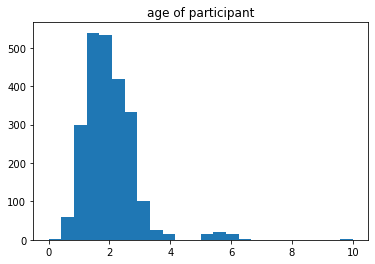

In [20]:
fig, ax = plt.subplots()
ax.hist(np.array(ages)/12, bins=np.linspace(0,10,25));
ax.set_title('age of participant')

### Create a phone dataset of english 

In [21]:
all_participant_df.role.unique()

array(['Target Child', 'Mother', 'Camera Operator', 'Environment',
       'Grandmother', 'Father', 'Adult', 'Unidentified', 'Toy', 'Brother',
       'Sister', 'Investigator', 'Interviewer', 'Visitor',
       'Family Friend', 'Grandfather', 'Non Human', 'Observer', 'Uncle'],
      dtype=object)

In [22]:
def get_transcript_info(transcript_subset, participant_row):
    """ from a transcript, create a pandas dataframe of orthography/phones
    """

    # for participant in dataset
    participant_ts = transcript_subset[
        transcript_subset.speaker == participant_row.participant_id
    ]
    
    if type(participant_row.age) is not str:
        age = np.nan
    else:
        age = round(convert_age(participant_row.age) / 12, 3)

    phone_df = pd.DataFrame(
        [[
            participant_row.name,
            participant_row.transcript_id,
            age,
            dataset,
            participant_row.language,
            participant_row.sex,
            participant_ts.ipa_actual.values,
            participant_ts.orthography.values,
            participant_row.xml_loc,
            participant_row.role
        ]],
        columns=[
            "name",
            "transcript_id",
            "age",
            "dataset",
            "language",
            "sex",
            "phones",
            "orthography",
            "xml_loc",
            "role"
        ],
    )

    return phone_df

In [23]:
#def get_transcript_info(transcript_subset, participant_row):
#    return

In [24]:
from joblib.externals.loky import set_loky_pickler
from joblib import parallel_backend
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects

In [25]:
all_transcript_df['xml_str'] = [i.as_posix() for i in all_transcript_df.xml_loc]
all_participant_df['xml_str'] = [i.as_posix() for i in all_participant_df.xml_loc]
transcript_df['xml_str'] = [i.as_posix() for i in transcript_df.xml_loc]

In [33]:
phone_df = []
with Parallel(n_jobs=1) as parallel:
    for dataset in tqdm(datasets_to_use):
        # subset dataset
        ds_trdf = transcript_df[transcript_df.dataset == dataset]
        print("~~~~~~~~~~~~~~~~~~~~", dataset, "~~~~~~~~~~~~~~~~~~~~")
        # for transcripts in dataset
        phone_df.append(
            pd.concat(
                parallel(
                    delayed(get_transcript_info)(
                        transcript_subset=all_transcript_df[
                            all_transcript_df.transcript_id == transcript_row.transcript_id
                        ],
                        participant_row=participant_row,
                    )
                    for idx, transcript_row in tqdm(
                        ds_trdf.iterrows(), total=len(ds_trdf)
                    )
                    for idx, participant_row in all_participant_df[
                                all_participant_df.transcript_id == transcript_row.transcript_id
                    ].iterrows()
                )
            )
        )
phone_df = pd.concat(phone_df)

  0%|          | 0/3 [00:00<?, ?it/s]

~~~~~~~~~~~~~~~~~~~~ Providence ~~~~~~~~~~~~~~~~~~~~


  0%|          | 0/364 [00:00<?, ?it/s]

~~~~~~~~~~~~~~~~~~~~ Davis ~~~~~~~~~~~~~~~~~~~~


  0%|          | 0/602 [00:00<?, ?it/s]

~~~~~~~~~~~~~~~~~~~~ Goad ~~~~~~~~~~~~~~~~~~~~


  0%|          | 0/66 [00:00<?, ?it/s]

In [34]:
phone_df.to_pickle(PHONBANK_DFS/'phone_df_all_participants.pickle')

In [35]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,role
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Target Child
0,1,020926,26.000,Providence,eng,female,"[[None, None, None, None, None, None, None, No...","[[he, had, it, Mom, I, just, took, it, from, h...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Mother
0,2,020926,51.000,Providence,eng,female,"[[None], [None, None], [None, None, None, None...","[[okay], [that's, enough], [can't, you, xxx, t...",/mnt/cube/tsainbur/Projects/github_repos/LRSO_...,Grandmother


In [36]:
phone_df.xml_loc.unique()

array([PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/raw/PHON_Data_Dir/corpora/Eng-NA/Providence/Alex/020926.xml'),
       PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/raw/PHON_Data_Dir/corpora/Eng-NA/Providence/Alex/030006.xml'),
       PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/raw/PHON_Data_Dir/corpora/Eng-NA/ComptonPater/Sean/011117.xml'),
       ...,
       PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/raw/PHON_Data_Dir/corpora/Eng-NA/Goad/Sonya/21007.xml'),
       PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/raw/PHON_Data_Dir/corpora/Eng-NA/Goad/Sonya/11105.xml'),
       PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/raw/PHON_Data_Dir/corpora/Eng-NA/Goad/Son